# Session 4 — Transformations: Joins, Grouping, Pivoting

Combine tables and create analytics-friendly shapes. Emulate pivots with conditional aggregation.


## Environment Setup

In [1]:
import sys, sqlite3, pandas as pd, numpy as np, matplotlib.pyplot as plt
print(sys.version)
import seaborn as sns
sns.set_theme()
from pathlib import Path
DB_PATH = Path('course.db')
conn = sqlite3.connect(DB_PATH)
conn.execute('PRAGMA foreign_keys=ON;')
print('SQLite ready at', DB_PATH.resolve())

3.11.9 (v3.11.9:de54cf5be3, Apr  2 2024, 07:12:50) [Clang 13.0.0 (clang-1300.0.29.30)]
SQLite ready at /Users/subhasht/Desktop/VSCode Programs/GenAI_Curriculum/Phase1/Data_Engineering/course.db


In [2]:
def run_sql(q, params=None):
    params = params or {}
    df = pd.read_sql_query(q, conn, params=params)
    display(df)
    return df

## 1. Joins Refresher & Examples

In [3]:
run_sql('''
SELECT o.order_id, c.name AS customer, o.order_date, s.name AS shipper
FROM orders o
JOIN customers c ON o.customer_id=c.customer_id
LEFT JOIN shippers s ON o.shipper_id=s.shipper_id
ORDER BY o.order_id;
''')

,order_id,customer,order_date,shipper
0,1,Aria,2024-10-01,Postal Express
1,2,Aria,2024-10-05,GoFast
2,3,Ben,2024-11-02,GoFast
3,4,Chloe,2024-11-03,Eagle Air


,order_id,customer,order_date,shipper
0,1,Aria,2024-10-01,Postal Express
1,2,Aria,2024-10-05,GoFast
2,3,Ben,2024-11-02,GoFast
3,4,Chloe,2024-11-03,Eagle Air


## 2. Aggregations and HAVING

In [4]:
run_sql('''
SELECT c.city, SUM(oi.quantity*p.price) AS revenue
FROM orders o
JOIN order_items oi ON o.order_id=oi.order_id
JOIN products p ON oi.product_id=p.product_id
JOIN customers c ON o.customer_id=c.customer_id
GROUP BY c.city
HAVING revenue > 100
ORDER BY revenue DESC;
''')

,city,revenue
0,Austin,298.95
1,Chicago,189.00


,city,revenue
0,Austin,298.95
1,Chicago,189.00


## 3. Pivot-Style Summary (Conditional Aggregation)

In [5]:
run_sql('''
SELECT c.country,
       SUM(CASE WHEN p.product='Keyboard' THEN oi.quantity ELSE 0 END) AS keyboards,
       SUM(CASE WHEN p.product='Mouse' THEN oi.quantity ELSE 0 END) AS mice,
       SUM(CASE WHEN p.product='Monitor' THEN oi.quantity ELSE 0 END) AS monitors,
       SUM(CASE WHEN p.product='USB-C Cable' THEN oi.quantity ELSE 0 END) AS cables
FROM orders o
JOIN order_items oi ON o.order_id=oi.order_id
JOIN products p ON oi.product_id=p.product_id
JOIN customers c ON o.customer_id=c.customer_id
GROUP BY c.country
ORDER BY c.country;
''')

,country,keyboards,mice,monitors,cables
0,Germany,0,2,0,0
1,USA,2,0,2,3


,country,keyboards,mice,monitors,cables
0,Germany,0,2,0,0
1,USA,2,0,2,3


## 4. Visualize Revenue by City

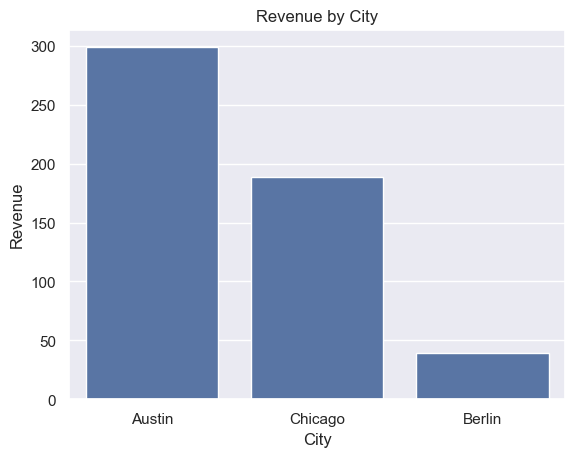

In [6]:
df_rev = pd.read_sql_query('''
SELECT c.city AS city, SUM(oi.quantity*p.price) AS revenue
FROM orders o
JOIN order_items oi ON o.order_id=oi.order_id
JOIN products p ON oi.product_id=p.product_id
JOIN customers c ON o.customer_id=c.customer_id
GROUP BY c.city
ORDER BY revenue DESC;
''', conn)
sns.barplot(data=df_rev, x="city", y="revenue")
plt.title("Revenue by City"); plt.xlabel("City"); plt.ylabel("Revenue"); plt.show()